In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits

In [186]:
ff = pd.read_csv("../results/2022_07_flares_vetted.csv")
ff_to_fill = pd.read_csv("../results/2022_07_flares.csv")
ff.shape

(962, 22)

In [188]:

ff_to_fill.loc[(ff_to_fill["total_n_valid_data_points"]==32946) &
           (ff_to_fill["ID"] =="Kepler-19") &
           (ff_to_fill["TIC"] =="122375047")] #&
#            (ff_to_fill["qcs"] ==12) &
#            (ff_to_fill["lc_n"] ==6)),:]

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,12,Kepler,2022_07_29,3,123.0,2.5,-1.0,NaN


In [189]:
index_to_fill_from = 979

In [190]:
ff_new = ff.append(ff_to_fill.iloc[index_to_fill_from:])
ff_new.iloc[ff.shape[0]-5:ff.shape[0]+5]

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,...,ID,TIC,qcs,mission,tstamp,lc_n,w,mask_pos_outliers_sigma,real,note
957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,11,Kepler,2022_07_29,2,123.0,2.5,-1.0,NaN
958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,11,Kepler,2022_07_29,2,123.0,2.5,-1.0,NaN
959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,12,Kepler,2022_07_29,3,123.0,2.5,-1.0,NaN
960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,12,Kepler,2022_07_29,3,123.0,2.5,-1.0,NaN
961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,12,Kepler,2022_07_29,3,123.0,2.5,-1.0,NaN
979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,12,Kepler,2022_07_29,3,123.0,2.5,-1.0,NaN
980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,13,Kepler,2022_07_29,4,123.0,2.5,-1.0,NaN
981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,13,Kepler,2022_07_29,4,123.0,2.5,-1.0,NaN
982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,13,Kepler,2022_07_29,4,123.0,2.5,-1.0,NaN
983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Kepler-19,122375047,14,Kepler,2022_07_29,5,125.0,2.5,-1.0,NaN


In [191]:
ff_new.shape

(5700, 22)

In [192]:
ff_new.to_csv("../results/2022_07_flares_vetted.csv",index=False)

# Vetting flares

Left to vet: 810
('158324245', 'KOI-13', 12, 'Kepler', '2022_07_30')
           tstart        tstop      ID        TIC  qcs  real
2325  1099.462849  1099.721668  KOI-13  158324245   12   NaN
2326  1099.730523  1099.733928  KOI-13  158324245   12   NaN
2327  1099.750275  1099.752999  KOI-13  158324245   12   NaN
2328  1122.223486  1122.247325  KOI-13  158324245   12   NaN
2329  1122.344043  1122.416242  KOI-13  158324245   12   NaN
2330  1122.420328  1122.472093  KOI-13  158324245   12   NaN
2331  1122.474817  1122.482310  KOI-13  158324245   12   NaN
2332  1122.487078  1122.493208  KOI-13  158324245   12   NaN
2333  1122.501381  1122.503424  KOI-13  158324245   12   NaN
2334  1122.534074  1122.536118  KOI-13  158324245   12   NaN
2335  1152.778583  1152.783351  KOI-13  158324245   12   NaN
2336  1152.786757  1152.790843  KOI-13  158324245   12   NaN
2337  1152.796292  1152.799017  KOI-13  158324245   12   NaN
2338  1152.803104  1153.988267  KOI-13  158324245   12   NaN
2339  1153.99439

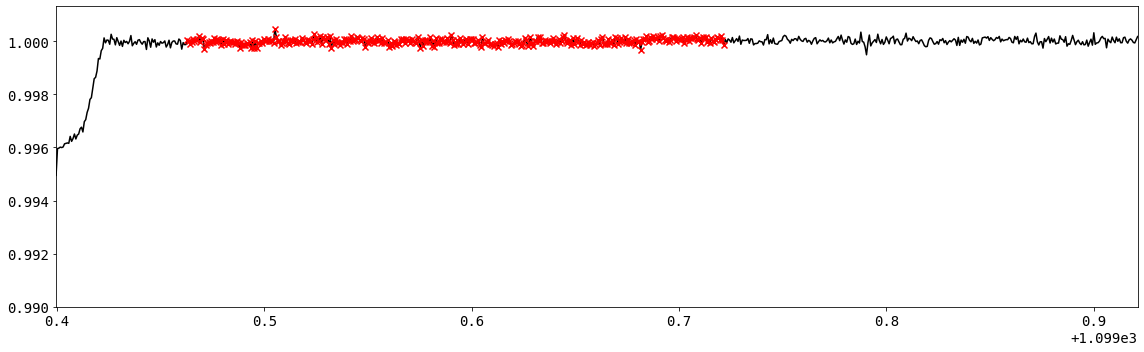

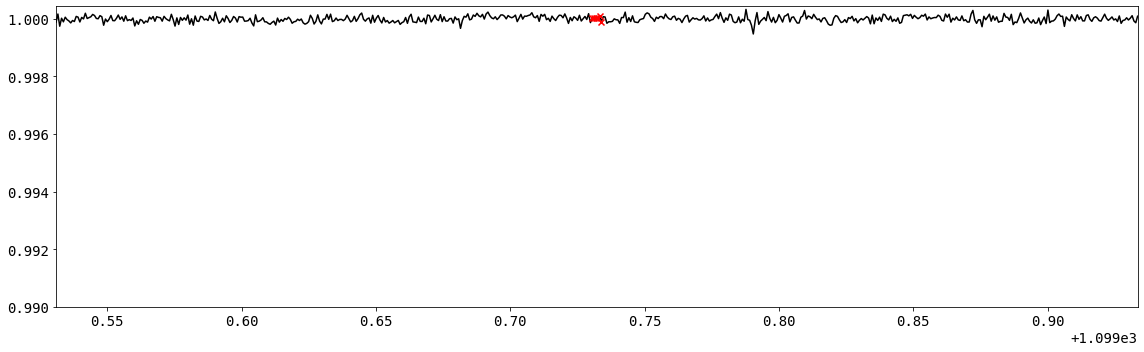

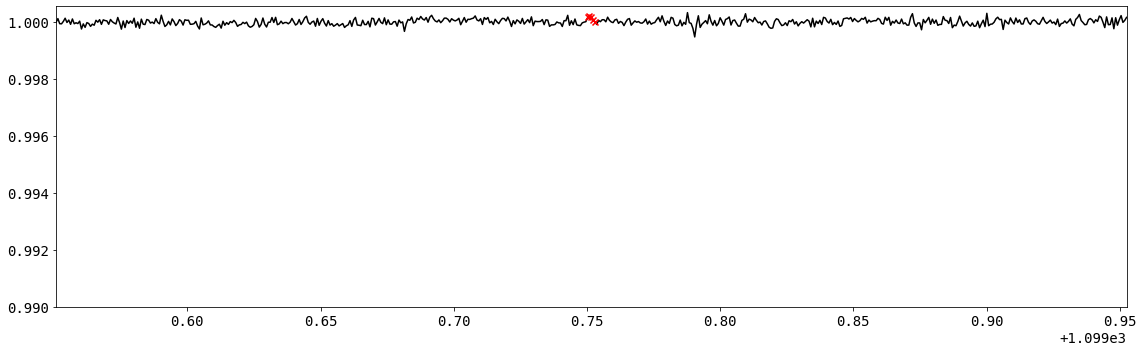

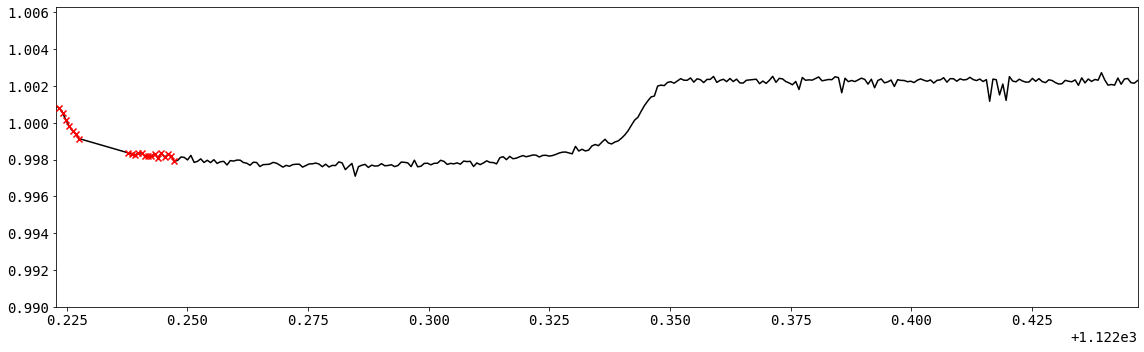

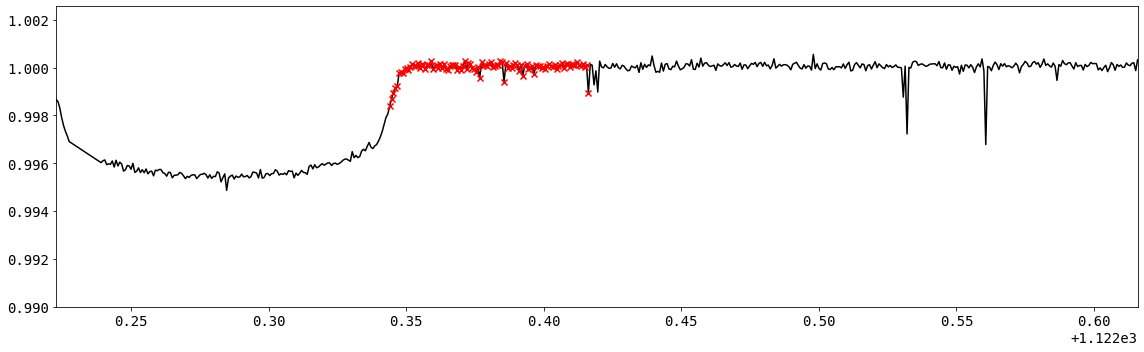

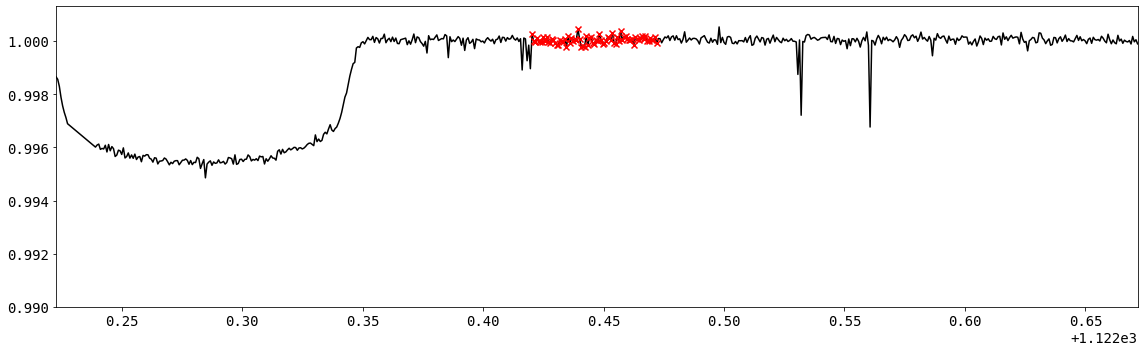

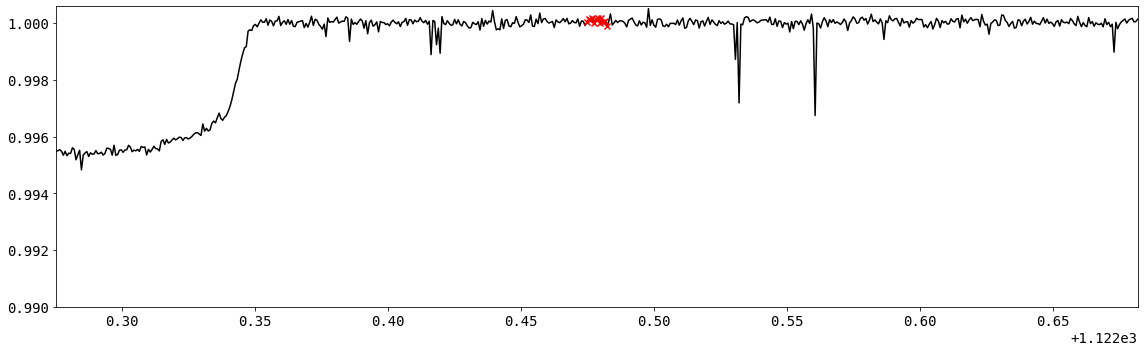

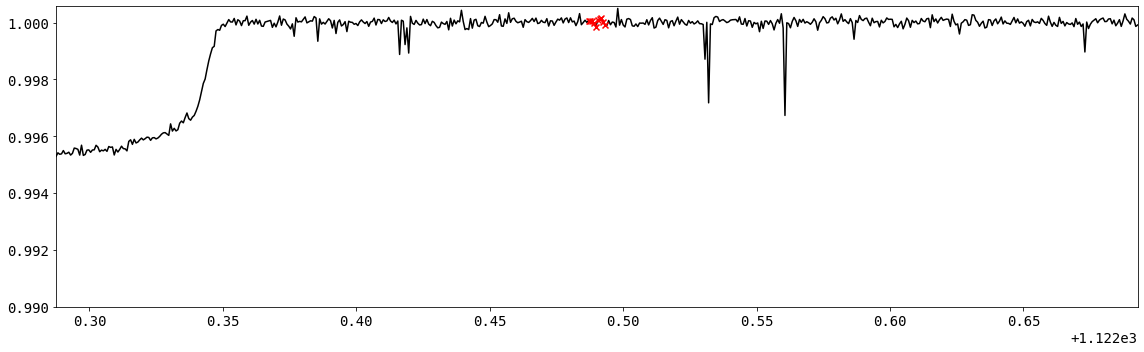

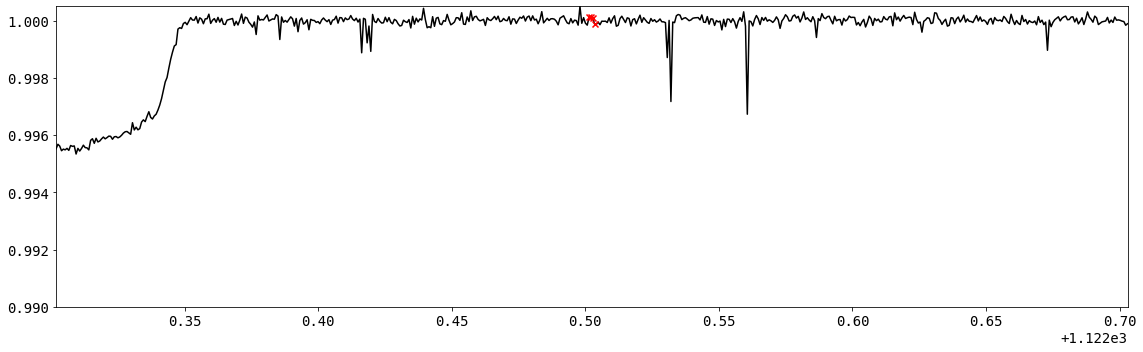

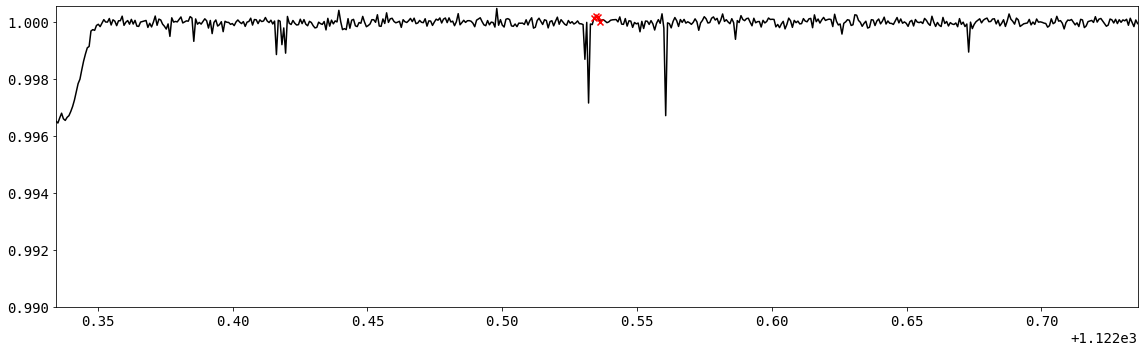

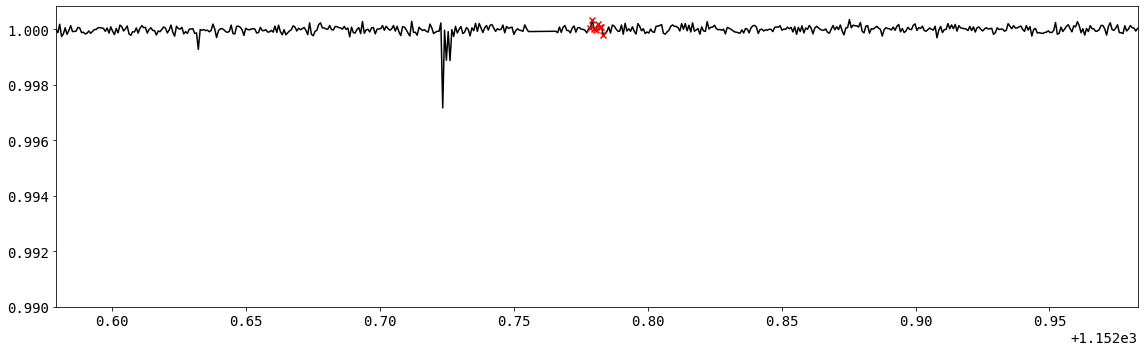

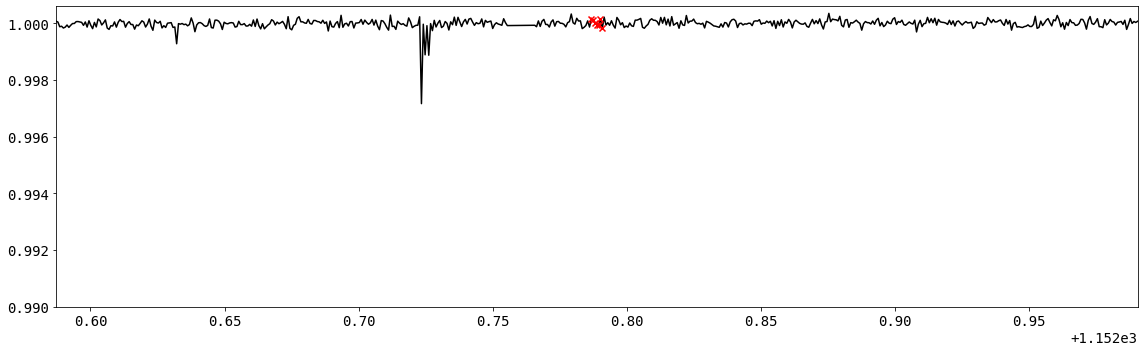

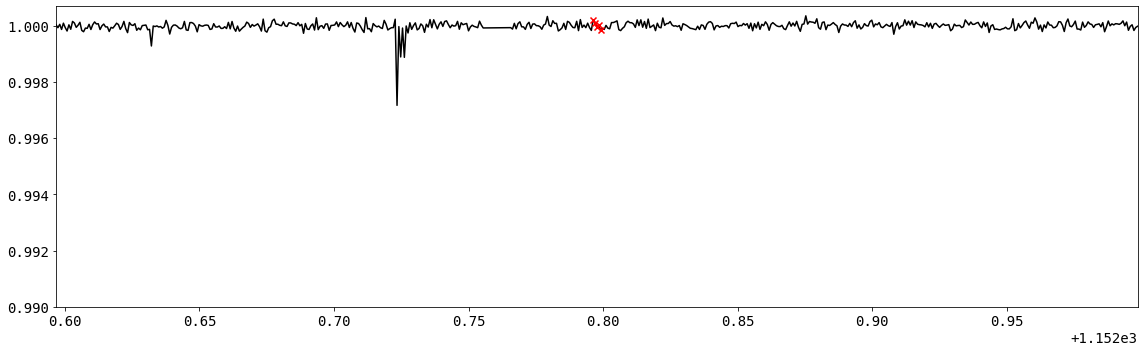

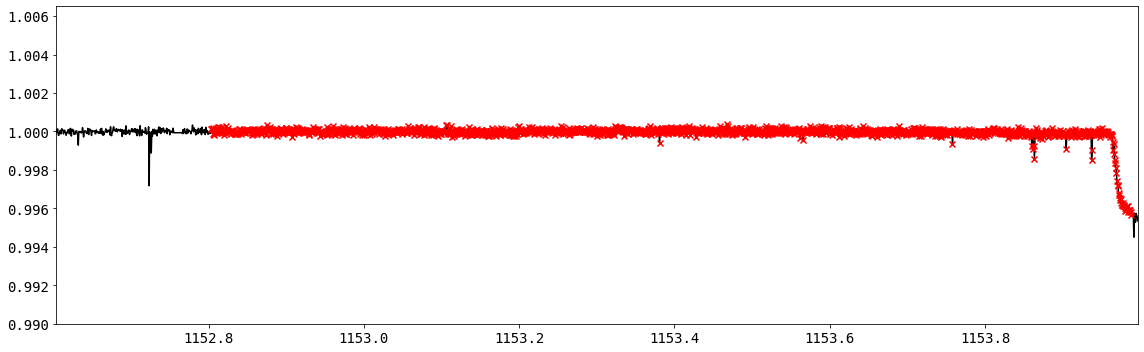

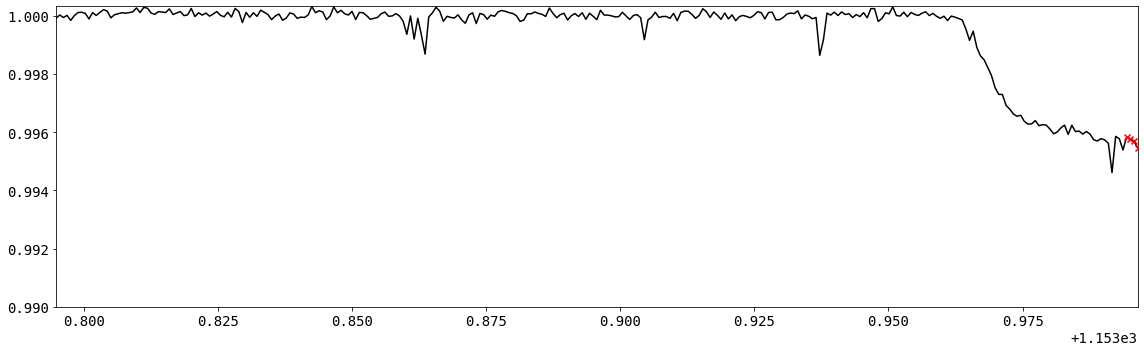

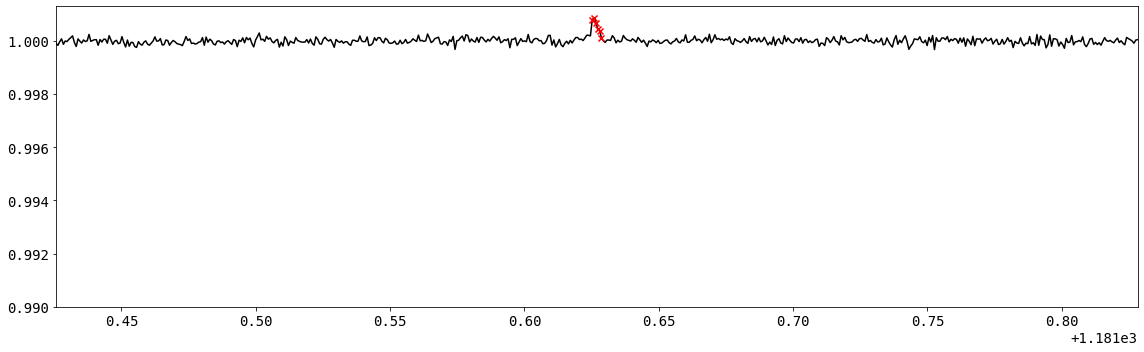

In [770]:
# --------------------------------------
# select flares to vet
f = pd.read_csv("../results/2022_07_flares_vetted.csv")
# ff = ff[(ff.ID == string.split("_")[0]) & (ff.qcs==int(string.split("_")[1]))]
columns = ["TIC","ID","qcs","mission","tstamp"]
name = list(f[f.real.isnull()].groupby(columns).indices)[0]
ff = f[f.real.isnull()].groupby(columns).get_group(name)
TIC, ID, qcs, mission,tstamp = name
shape = f.shape[0]
print(f"Left to vet: {f[f.real.isnull()].shape[0]}")
print(name)
print(ff[['tstart',"tstop","ID","TIC","qcs","real"]])
# ---------------------------------------
# view flares
%matplotlib inline
for j, flare in ff.iloc[:].iterrows():
    ts, tf = flare.tstart, flare.tstop
    t0, t1, i = 1e5, 0., 0
    
    while (ts<t0) | (ts>t1):
        try:
            string = f"{ID}_{qcs:02}_altai_{i}"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        except FileNotFoundError:
            string = f"{TIC}_{qcs:02}_altai_{i}"
            fff = fits.open(f"/media/ekaterina/182C-BC05/lcs_w_phases/{tstamp}_{string}.fits")[1].data
        t0,t1 = fff["time"][0],fff["time"][-1]
#         print(t0,ts,t1)
        i+=1
    plt.figure(figsize=(16,5))
    cap=.5
    
#     print(ts,tf)
    _ = fff[np.where((fff['time']>=ts-.1/cap) & (fff['time']<=tf+.1/cap))]
    med = np.median(_['flux'])
    plt.plot(_['time'], _['flux']/med, c="k")
    plt.xlim(_["time"][0],_["time"][-1])
    _ = fff[np.where((fff['time']>=ts-1e-8) & (fff['time']<=tf+1e-8))]
    plt.scatter(_['time'], _['flux']/med, c="r",zorder=10)

    plt.scatter(ts, flare.phase/5 + 1)
    plt.plot(_['time'], _['phase']/5 + 1, c="grey")
    plt.ylim(.99,flare.ampl_rec*1.5 +1)
    


In [766]:
f.loc[ff.index,columns+["real"]]

,TIC,ID,qcs,mission,tstamp,real
2321,158324245,KOI-13,11,Kepler,2022_07_30,NaN
2322,158324245,KOI-13,11,Kepler,2022_07_30,NaN
2323,158324245,KOI-13,11,Kepler,2022_07_30,NaN
2324,158324245,KOI-13,11,Kepler,2022_07_30,NaN


In [767]:
f.loc[ff.index,"real"] = 0

In [768]:
f.loc[ff.index,"real"]

2321    0.0
2322    0.0
2323    0.0
2324    0.0
Name: real, dtype: float64

In [769]:
assert f.shape[0] == shape
f.to_csv("../results/2022_07_flares_vetted.csv",index=False)